In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
with open("dataset\\kddcup.names",'r') as f:
    print(f.read())

back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

In [3]:
cols="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

columns=[]
for c in cols.split(','):
    if(c.strip()):
       columns.append(c.strip())

columns.append('target')
#print(columns)
print(len(columns))

42


In [4]:
with open("dataset\\training_attack_types",'r') as f:
    print(f.read())

back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l




In [5]:
attacks_types = {
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}


READING DATASET

In [6]:
path = r"F:\4-2\major project\IPS using ML\dataset\kddcup.csv"
df = pd.read_csv(path,names=columns)

#Adding Attack Type column
df['Attack Type'] = df.target.apply(lambda r:attacks_types[r[:-1]])
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,normal.,normal
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1.0,0.0,1.00,0.00,0.0,0.00,0.0,0.0,normal.,normal
2,0,tcp,http,SF,236,1228,0,0,0,0,...,1.0,0.0,0.50,0.00,0.0,0.00,0.0,0.0,normal.,normal
3,0,tcp,http,SF,233,2032,0,0,0,0,...,1.0,0.0,0.33,0.00,0.0,0.00,0.0,0.0,normal.,normal
4,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.25,0.00,0.0,0.00,0.0,0.0,normal.,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898426,0,tcp,http,SF,212,2288,0,0,0,0,...,1.0,0.0,0.33,0.05,0.0,0.01,0.0,0.0,normal.,normal
4898427,0,tcp,http,SF,219,236,0,0,0,0,...,1.0,0.0,0.25,0.05,0.0,0.01,0.0,0.0,normal.,normal
4898428,0,tcp,http,SF,218,3610,0,0,0,0,...,1.0,0.0,0.20,0.05,0.0,0.01,0.0,0.0,normal.,normal
4898429,0,tcp,http,SF,219,1234,0,0,0,0,...,1.0,0.0,0.17,0.05,0.0,0.01,0.0,0.0,normal.,normal


In [7]:
df.shape

(4898431, 43)

In [8]:
df['target'].value_counts()

smurf.              2807886
neptune.            1072017
normal.              972781
satan.                15892
ipsweep.              12481
portsweep.            10413
nmap.                  2316
back.                  2203
warezclient.           1020
teardrop.               979
pod.                    264
guess_passwd.            53
buffer_overflow.         30
land.                    21
warezmaster.             20
imap.                    12
rootkit.                 10
loadmodule.               9
ftp_write.                8
multihop.                 7
phf.                      4
perl.                     3
spy.                      2
Name: target, dtype: int64

In [9]:
df['Attack Type'].value_counts()

dos       3883370
normal     972781
probe       41102
r2l          1126
u2r            52
Name: Attack Type, dtype: int64

In [10]:
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

DATA PREPROCESSING

In [11]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [12]:
#Finding categorical features
num_cols = df._get_numeric_data().columns

cate_cols = list(set(df.columns)-set(num_cols))
cate_cols.remove('target')
cate_cols.remove('Attack Type')

cate_cols

['protocol_type', 'service', 'flag']

CATEGORICAL FEATURES DISTRIBUTION

In [13]:
#Visualization
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

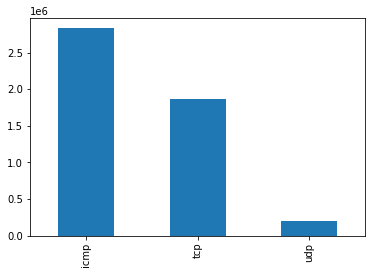

In [14]:
bar_graph('protocol_type')
#bar_graph('target')
#bar_graph('Attack Type')
#bar_graph('flag')
#bar_graph('service')

Protocol type: We notice that ICMP is the most present in the used data, then TCP and almost 2500000 packets of UDP type

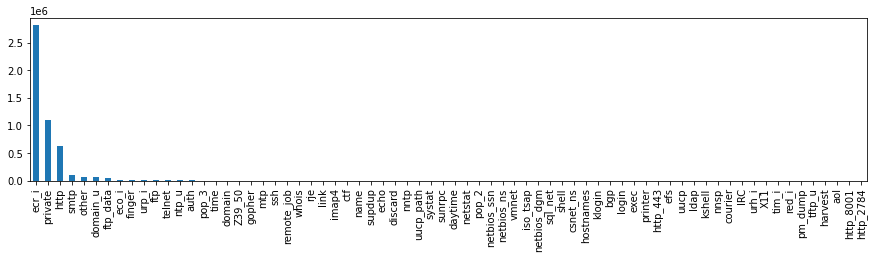

In [15]:
plt.figure(figsize=(15,3))
bar_graph('service')

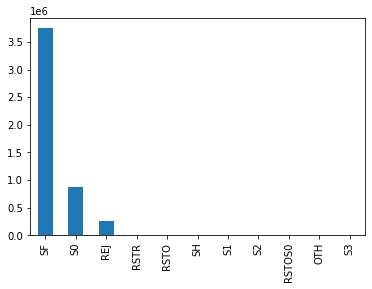

In [16]:
bar_graph('flag')

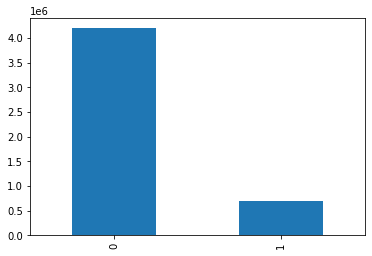

In [17]:
bar_graph('logged_in')

logged_in (1 if successfully logged in; 0 otherwise): We notice that just 700000 packets are successfully logged in.

TARGET FEATURE DISTRIBUTION

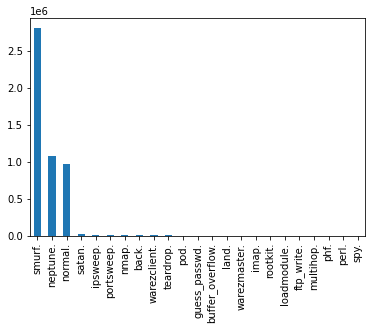

In [18]:
bar_graph('target')

Attack Type(The attack types grouped by attack, it's what we will predict)

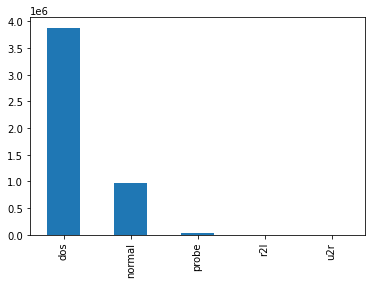

In [19]:
bar_graph('Attack Type')

In [20]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target', 'Attack Type'],
      dtype='object')

DATA CORRELATION

C:\Users\akhil\AppData\Local\Temp\ipykernel_33676\4162482413.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')# drop columns with NaN


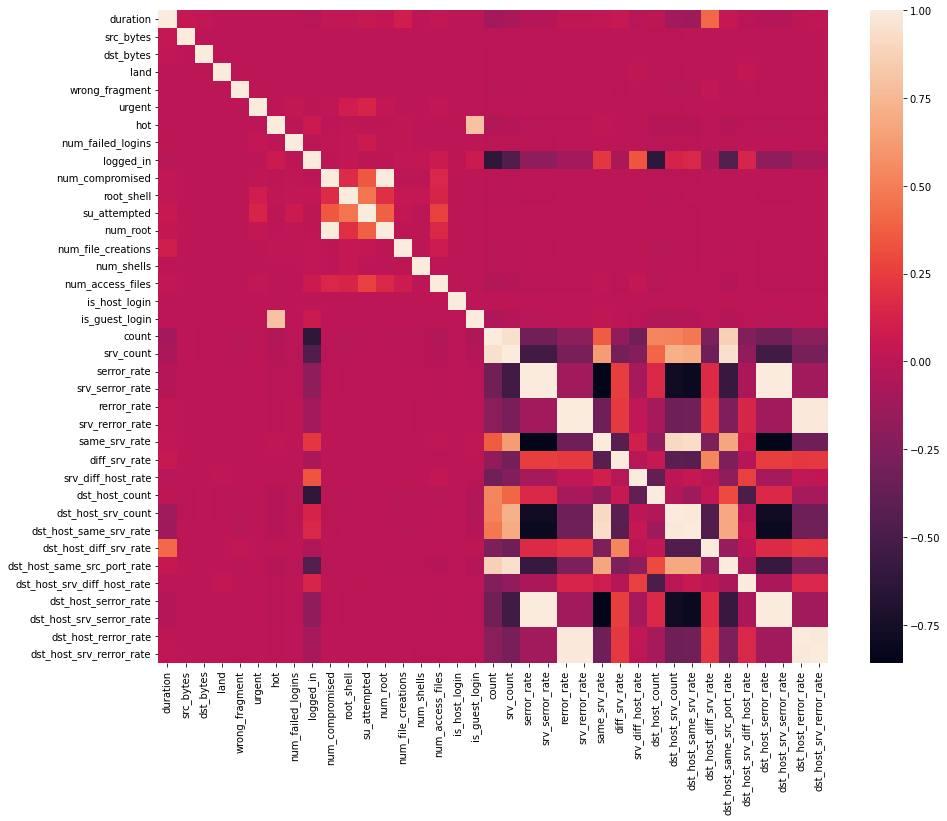

In [21]:
df = df.dropna('columns')# drop columns with NaN

df = df[[col for col in df if df[col].nunique() > 1]]# keep columns where there are more than 1 unique values

corr = df.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr)

plt.show()

In [22]:
df['num_root'].corr(df['num_compromised'])

0.9975798933478788

In [23]:
df['srv_serror_rate'].corr(df['serror_rate'])

0.998692413866282

In [24]:
df['srv_count'].corr(df['count'])

0.9433902218806605

In [25]:
df['srv_rerror_rate'].corr(df['rerror_rate'])

0.9953719458068605

In [26]:
df['dst_host_same_srv_rate'].corr(df['dst_host_srv_count'])

0.9788464524221455

In [27]:
df['dst_host_srv_serror_rate'].corr(df['dst_host_serror_rate'])

0.9982859559764777

In [28]:
df['dst_host_srv_rerror_rate'].corr(df['dst_host_rerror_rate'])

0.9869790678085133

In [29]:
df['dst_host_same_srv_rate'].corr(df['same_srv_rate'])

0.9316213679070299

In [30]:
df['dst_host_srv_count'].corr(df['same_srv_rate'])

0.9075289446663145

In [31]:
df['dst_host_same_src_port_rate'].corr(df['srv_count'])

0.9473596471555572

In [32]:
df['dst_host_serror_rate'].corr(df['serror_rate'])

0.9990059376729266

In [33]:
df['dst_host_serror_rate'].corr(df['srv_serror_rate'])

0.9979417182529224

In [34]:
df['dst_host_srv_serror_rate'].corr(df['serror_rate'])

0.9982509415921331

In [35]:
df['dst_host_srv_serror_rate'].corr(df['srv_serror_rate'])

0.999391730038362

In [36]:
df['dst_host_rerror_rate'].corr(df['rerror_rate'])

0.9897555886506412

In [37]:
df['dst_host_rerror_rate'].corr(df['srv_rerror_rate'])

0.985553062456559

In [38]:
df['dst_host_srv_rerror_rate'].corr(df['rerror_rate'])

0.9859781723136949

In [39]:
df['dst_host_srv_rerror_rate'].corr(df['srv_rerror_rate'])

0.9879088754809274

In [40]:
#This variable is highly correlated with num_compromised and should be ignored for analysis.
#(Correlation = 0.9938277978738366)
df.drop('num_root',axis = 1,inplace = True)

#This variable is highly correlated with serror_rate and should be ignored for analysis.
#(Correlation = 0.9983615072725952)
df.drop('srv_serror_rate',axis = 1,inplace = True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9947309539817937)
df.drop('srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_serror_rate and should be ignored for analysis.
#(Correlation = 0.9993041091850098)
df.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9869947924956001)
df.drop('dst_host_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9821663427308375)
df.drop('dst_host_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9851995540751249)
df.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with dst_host_srv_count and should be ignored for analysis.
#(Correlation = 0.9865705438845669)
df.drop('dst_host_same_srv_rate',axis = 1, inplace=True)

In [41]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,tcp,http,SF,215,45076,0,0,0,0,...,1.0,0.0,0.0,0,0,0.0,0.00,0.0,normal.,normal
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1.0,0.0,0.0,1,1,0.0,1.00,0.0,normal.,normal
2,0,tcp,http,SF,236,1228,0,0,0,0,...,1.0,0.0,0.0,2,2,0.0,0.50,0.0,normal.,normal
3,0,tcp,http,SF,233,2032,0,0,0,0,...,1.0,0.0,0.0,3,3,0.0,0.33,0.0,normal.,normal
4,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.0,4,4,0.0,0.25,0.0,normal.,normal


In [42]:
df.shape

(4898431, 34)

In [43]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_file_creations', 'num_shells', 'num_access_files',
       'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'target',
       'Attack Type'],
      dtype='object')

In [44]:
df_std = df.std()
df_std = df_std.sort_values(ascending = True)
df_std

C:\Users\akhil\AppData\Local\Temp\ipykernel_33676\1261043509.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_std = df.std()


is_host_login                       0.000639
land                                0.002391
urgent                              0.007215
num_failed_logins                   0.007299
su_attempted                        0.008082
root_shell                          0.008257
num_shells                          0.008738
is_guest_login                      0.028887
num_access_files                    0.035510
dst_host_srv_diff_host_rate         0.041260
wrong_fragment                      0.042854
diff_srv_rate                       0.082715
dst_host_diff_srv_rate              0.108543
num_file_creations                  0.124186
srv_diff_host_rate                  0.140560
rerror_rate                         0.232253
logged_in                           0.350612
serror_rate                         0.381876
same_srv_rate                       0.389296
hot                                 0.468978
dst_host_same_src_port_rate         0.480988
num_compromised                     3.856481
dst_host_c

FEATURE MAPPING

In [45]:
df['protocol_type'].value_counts()

icmp    2833545
tcp     1870598
udp      194288
Name: protocol_type, dtype: int64

In [46]:
#protocol_type feature mapping
pmap = {'icmp':0,'tcp':1,'udp':2}
df['protocol_type'] = df['protocol_type'].map(pmap)

In [47]:
df['flag'].value_counts()

SF        3744328
S0         869829
REJ        268874
RSTR         8094
RSTO         5344
SH           1040
S1            532
S2            161
RSTOS0        122
OTH            57
S3             50
Name: flag, dtype: int64

In [48]:
#flag feature mapping
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
df['flag'] = df['flag'].map(fmap)

In [49]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,1,http,0,215,45076,0,0,0,0,...,1.0,0.0,0.0,0,0,0.0,0.00,0.0,normal.,normal
1,0,1,http,0,162,4528,0,0,0,0,...,1.0,0.0,0.0,1,1,0.0,1.00,0.0,normal.,normal
2,0,1,http,0,236,1228,0,0,0,0,...,1.0,0.0,0.0,2,2,0.0,0.50,0.0,normal.,normal
3,0,1,http,0,233,2032,0,0,0,0,...,1.0,0.0,0.0,3,3,0.0,0.33,0.0,normal.,normal
4,0,1,http,0,239,486,0,0,0,0,...,1.0,0.0,0.0,4,4,0.0,0.25,0.0,normal.,normal


In [50]:
df.drop('service',axis = 1,inplace= True)

In [51]:
df.shape

(4898431, 33)

In [52]:
df.head()

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,1,0,215,45076,0,0,0,0,0,...,1.0,0.0,0.0,0,0,0.0,0.00,0.0,normal.,normal
1,0,1,0,162,4528,0,0,0,0,0,...,1.0,0.0,0.0,1,1,0.0,1.00,0.0,normal.,normal
2,0,1,0,236,1228,0,0,0,0,0,...,1.0,0.0,0.0,2,2,0.0,0.50,0.0,normal.,normal
3,0,1,0,233,2032,0,0,0,0,0,...,1.0,0.0,0.0,3,3,0.0,0.33,0.0,normal.,normal
4,0,1,0,239,486,0,0,0,0,0,...,1.0,0.0,0.0,4,4,0.0,0.25,0.0,normal.,normal


In [53]:
df.dtypes

duration                         int64
protocol_type                    int64
flag                             int64
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
rerror_rate                    float64
same_srv_rate                  float64
diff_srv_rate                  float64
srv_diff_host_rate       

MODELLING

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [55]:
df = df.drop(['target',], axis=1)
print(df.shape)

# Target variable and train set
Y = df[['Attack Type']]
X = df.drop(['Attack Type',], axis=1)

sc = MinMaxScaler()
X = sc.fit_transform(X)

# Split test and train data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(4898431, 32)
(3281948, 31) (1616483, 31)
(3281948, 1) (1616483, 1)


GAUSSIAN NAIVE BAYES

In [56]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [57]:
model1 = GaussianNB()

In [58]:
start_time = time.time()
model1.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [59]:
NB_train_time=end_time-start_time
print("Training time: ",NB_train_time)

Training time:  5.344653606414795


In [60]:
start_time = time.time()
Y_test_pred1 = model1.predict(X_test)
end_time = time.time()

In [61]:
NB_test_time=end_time-start_time
print("Testing time: ",NB_test_time)

Testing time:  2.4707229137420654


In [62]:
NB_train=model1.score(X_train,Y_train)
NB_test=model1.score(X_test,Y_test)
print("Train score is:",NB_train)
print("Test score is:",NB_test)

Train score is: 0.9251993023655463
Test score is: 0.9249073451437473


DECISION TREE

In [63]:
#Decision Tree 
from sklearn.tree import DecisionTreeClassifier

In [64]:
model2 = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [65]:
start_time = time.time()
model2.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [66]:
DT_train_time=end_time-start_time
print("Training time: ",DT_train_time)

Training time:  9.980464458465576


In [67]:
start_time = time.time()
Y_test_pred2 = model2.predict(X_test)
end_time = time.time()

In [68]:
DT_test_time=end_time-start_time
print("Testing time: ",DT_test_time)

Testing time:  0.22530317306518555


In [69]:
DT_train=model2.score(X_train,Y_train)
DT_test=model2.score(X_test,Y_test)
print("Train score is:", model2.score(X_train, Y_train))
print("Test score is:",model2.score(X_test,Y_test))

Train score is: 0.996125167126353
Test score is: 0.9961453352741724


RANDOM FOREST

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
model3 = RandomForestClassifier(n_estimators=30)

In [72]:
start_time = time.time()
model3.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [73]:
RF_train_time=end_time-start_time
print("Training time: ",RF_train_time)

Training time:  83.50311207771301


In [74]:
start_time = time.time()
Y_test_pred3 = model3.predict(X_test)
end_time = time.time()

In [75]:
RF_test_time=end_time-start_time
print("Testing time: ",RF_test_time)

Testing time:  4.55760383605957


In [76]:
RF_train=model3.score(X_train,Y_train)
RF_test=model3.score(X_test,Y_test)
print("Train score is:", RF_train)
print("Test score is:",RF_test)

Train score is: 0.999963741046476
Test score is: 0.9998558599131572


LOGISTIC REGRESSION

In [77]:
from sklearn.linear_model import LogisticRegression

In [78]:
model5 = LogisticRegression(max_iter=1200000)

In [79]:
start_time = time.time()
model5.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [80]:
LR_train_time=end_time-start_time
print("Training time: ",LR_train_time)

Training time:  809.5985288619995


In [81]:
start_time = time.time()
Y_test_pred5 = model5.predict(X_test)
end_time = time.time()

In [82]:
LR_test_time=end_time-start_time
print("Testing time: ",LR_test_time)

Testing time:  0.9274530410766602


In [83]:
LR_train=model5.score(X_train,Y_train)
LR_test=model5.score(X_test,Y_test)
print("Train score is:", LR_train)
print("Test score is:",LR_test)

Train score is: 0.9978988088781419
Test score is: 0.9978836770940369


TRAINING ACCURACY

<BarContainer object of 4 artists>

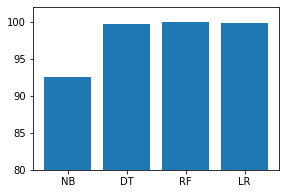

In [84]:
names = ['NB','DT','RF','LR']
values = [NB_train*100,DT_train*100,RF_train*100,LR_train*100]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.ylim(80,102)
plt.bar(names,values)

In [85]:
f.savefig('training_accuracy_figure.png',bbox_inches='tight')

TESTING ACCURACY

<BarContainer object of 4 artists>

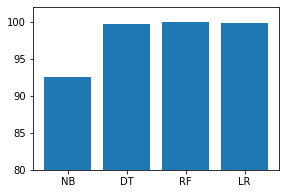

In [86]:
names = ['NB','DT','RF','LR']
values = [NB_test*100,DT_test*100,RF_test*100,LR_test*100]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.ylim(80,102)
plt.bar(names,values)

In [87]:
f.savefig('test_accuracy_figure.png',bbox_inches='tight')

TRAINING TIME

<BarContainer object of 4 artists>

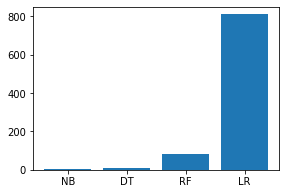

In [88]:
names = ['NB','DT','RF','LR']
values = [NB_train_time,DT_train_time,RF_train_time,LR_train_time]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.bar(names,values)

In [89]:
f.savefig('train_time_figure.png',bbox_inches='tight')

TESTING TIME

<BarContainer object of 4 artists>

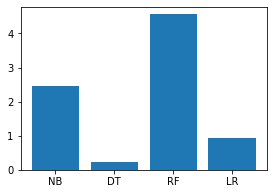

In [90]:
names = ['NB','DT','RF','LR']
values = [NB_test_time,DT_test_time,RF_test_time,LR_test_time]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.bar(names,values)

In [91]:
f.savefig('test_time_figure.png',bbox_inches='tight')

SAVE MODELS

In [92]:
import joblib

In [93]:
joblib.dump(model1,'naive bayes')

['naive bayes']

In [94]:
joblib.dump(model2,'decision tree')

['decision tree']

In [95]:
joblib.dump(model3,'random forest')

['random forest']

In [97]:
joblib.dump(model5,'logistic regression')

['logistic regression']

In [1]:
import joblib

In [2]:
random=joblib.load('random forest')

In [42]:
import numpy
x=[[0,0,0,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]

In [43]:
random.predict(x)

array(['normal'], dtype=object)